# Week4 - Homework 1

### Complete _todo_ parts in the following:

In [135]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [136]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [137]:
#loading first few lines of the data set
df.head()

,X1,X2,y
0,0.000000,A,10.002339
1,0.000628,B,-1.283608
2,0.001257,B,3.865767
3,0.001885,B,0.600183
4,0.002514,A,9.269188


<Axes: title={'center': 'X1 vs. y scatter plot'}, xlabel='X1', ylabel='y'>

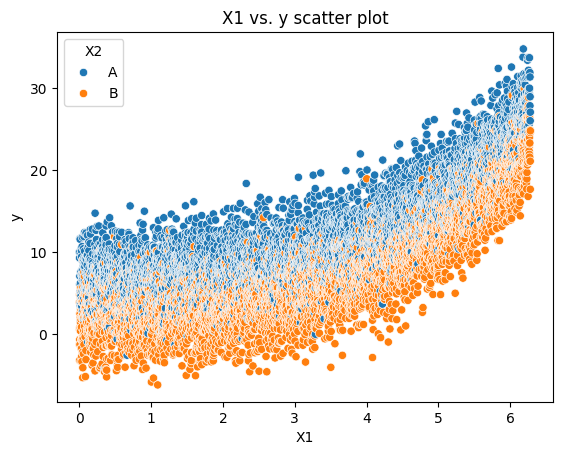

In [138]:
# todo: add a proper title
# graph visualization: scatter plot of X1 vs. y where classification is based on x2
plt.title("X1 vs. y scatter plot")
sns.scatterplot(data=df, x='X1', y='y', hue='X2')

<Axes: title={'center': 'X1 vs. y scatter plot'}, xlabel='X1', ylabel='y'>

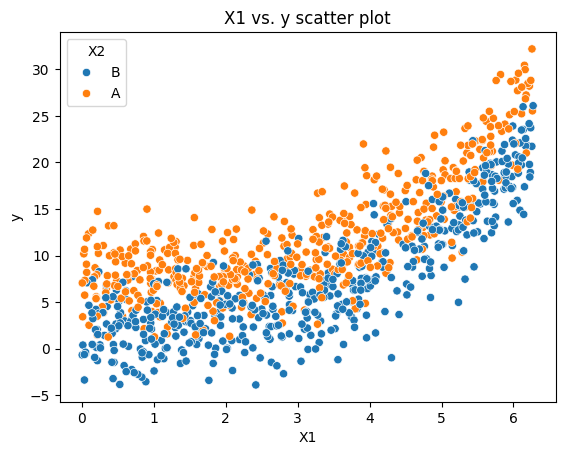

In [139]:
# todo: add the same title as above
plt.title("X1 vs. y scatter plot") #1000 sample data
sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo:
explain findings in the graphs

1. Points which are classifed as value A surge and have a high y value comparing to value B as categorized in X2.
2.  Points which are classifed as value B plunge and have a low y value comparing to value A as categorized in X2.
3. Non linear relationship between X1 and y
4. Increasing graph trend
  



In [140]:
X = df[['X1', 'X2']]
y = df.y

In [141]:
X.head()

,X1,X2
0,0.000000,A
1,0.000628,B
2,0.001257,B
3,0.001885,B
4,0.002514,A


In [142]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y)

0.5745032690043208

In [143]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5745032690043208

Text(0.5, 1.0, 'Actual vs. Predicted scatter plot')

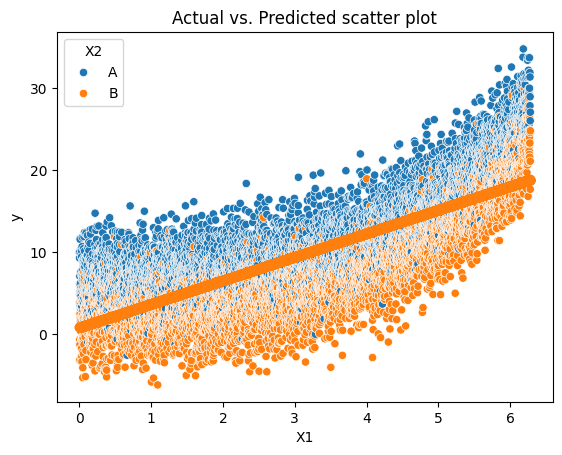

In [144]:
# todo: add a proper title
sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X.X1, y_pred)
plt.title('Actual vs. Predicted scatter plot')
# (feature X1 vs. target variable y scatter plot):actual along with the predicted values

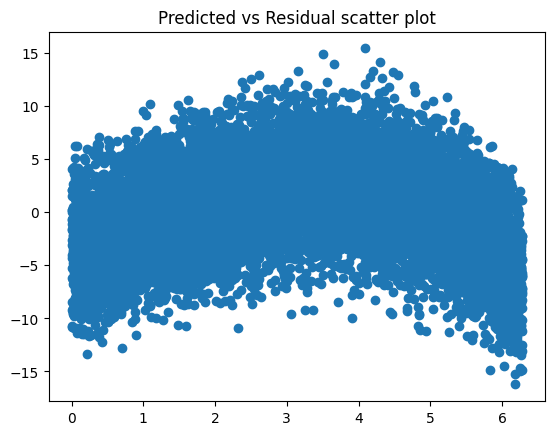

In [145]:
# todo: add a proper title
plt.title('Predicted vs Residual scatter plot')
plt.scatter(X.X1, y_pred-y)
#difference of predicted value and actual value

<Axes: title={'center': 'The Residual distribution Histrogram '}>

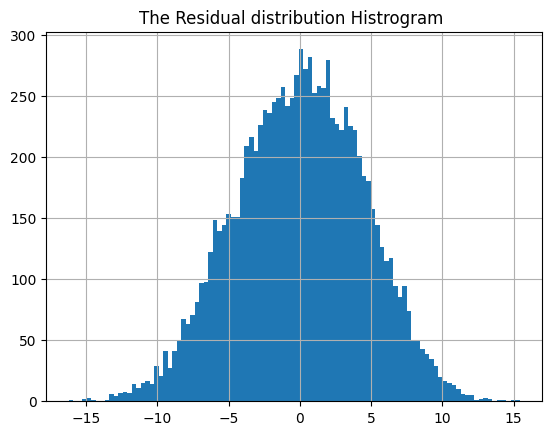

In [146]:
# todo: add a proper title
plt.title('The Residual distribution Histrogram ')
(y_pred-y).hist(bins=100)

#### Todo:
Explain findings in the graphs above & what we can try next

1. The model is not a good fit and the data can be transformed to get a better fit model.
2. There are lot of mistakes observed when it comes to predicted value.
3. To make the model understand better how feature and target value work togetter we need to add new feature and manage categorial data.
3. We can try using different model instead of linear regression which excel at category difference.




In [147]:
# todo: explain the code below, what we do & why we do it?

#what we did: To create a polynomial feature of degree 2
transform = PolynomialFeatures(degree=2)

#what we did: To transform the x1 values to a higher degree value
#why we did it: To increase the performance of the model which will improve the score
X_data = transform.fit_transform(X[['X1']])

#what we did: To create a linear regression model and fit the data into it.
model = LinearRegression()
model.fit(X_data, y)

##what we did: To access the models effectiveness and performance
model.score(X_data, y)

0.6778830894958272

In [148]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6778830894958272

Text(0.5, 1.0, 'Actual vs. Predicted on Transformed data ')

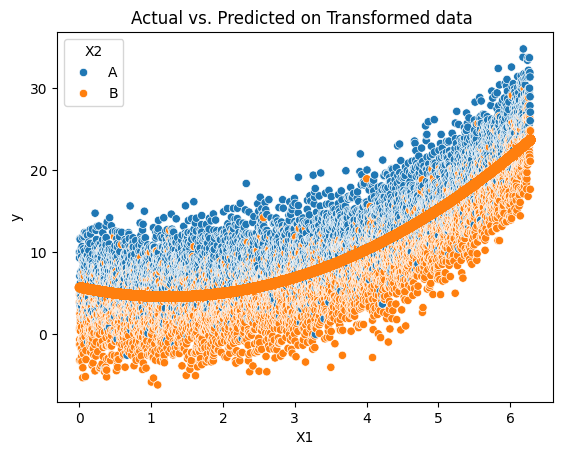

In [149]:
# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X.X1, y_pred)
plt.title('Actual vs. Predicted on Transformed data ')

Text(0.5, 1.0, 'Predicted vs. Residual with Transformed data')

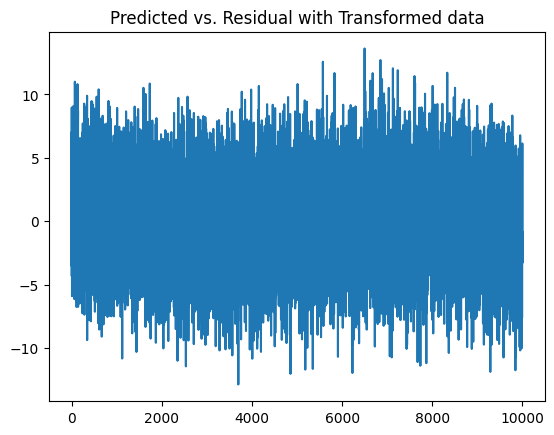

In [150]:
# todo: add a proper title

(y_pred-y).plot()
plt.title('Predicted vs. Residual with Transformed data')

<Axes: title={'center': 'The Residual distrubtion with transformed data'}>

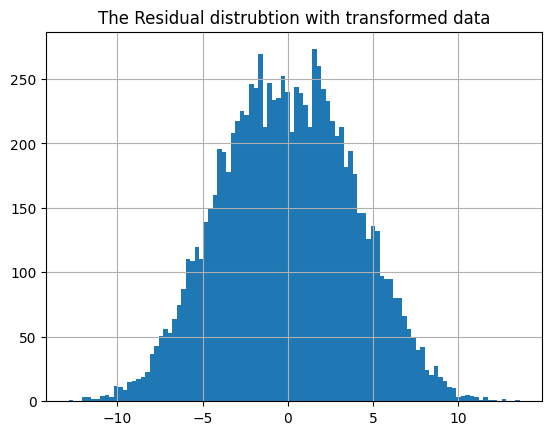

In [151]:
# todo: add a proper title
plt.title('The Residual distrubtion with transformed data')
(y_pred-y).hist(bins=100)

### Todo:
Explain findings in the above graphs & what can we do next?

As stated we need to add new feature and manage categorial value x2 to get better results as the above graph does not display much increase in performance of the model even after training it with the transformed data.

##  Finally:

In [152]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(),
#     columns=encoder.get_feature_names_out()
# ).head()

In [153]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [154]:
encoded_df = pd.DataFrame(
    data=encoded.todense(),
    columns=encoder.get_feature_names_out()
)

In [155]:
encoded_df.head()

,X2_B
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [156]:
# todo: explain the code

# store value of x1 into variable called numerical_features
numerical_features = ['X1']

#Binding the data together which was transformed to numerical values (x1->x2_B)
X_new = X[numerical_features].join(encoded_df)
#display the first few lines
X_new.head()

,X1,X2_B
0,0.000000,0.0
1,0.000628,1.0
2,0.001257,1.0
3,0.001885,1.0
4,0.002514,0.0


In [157]:
# todo: explain the code

#To create polynomial features
poly = PolynomialFeatures()

#to transform the data to high degree
X_data = poly.fit_transform(X_new)

#To craete linear regression model, fit the data and access its performance
model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y)

0.8085015036837276

In [158]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8085015036837276

Text(0.5, 1.0, 'Actual vs. Predicted with Transformed data using X2')

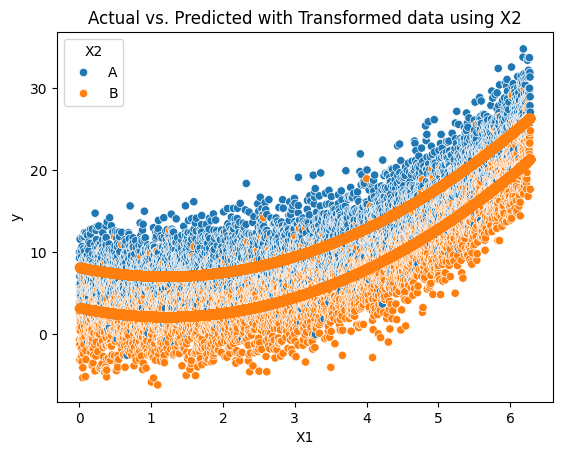

In [159]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X_new.X1, y_pred)
plt.title('Actual vs. Predicted with Transformed data using X2')

Text(0.5, 1.0, 'Predective errors Residual plot')

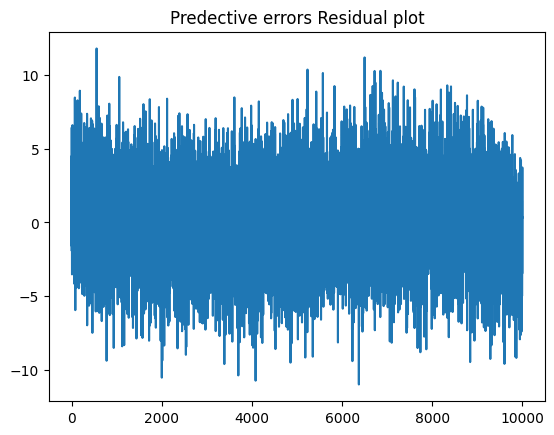

In [160]:
# todo: add a proper title

(y_pred-y).plot()
plt.title('Predective errors Residual plot')

Text(0.5, 1.0, 'Histogram Residual:predective errors ')

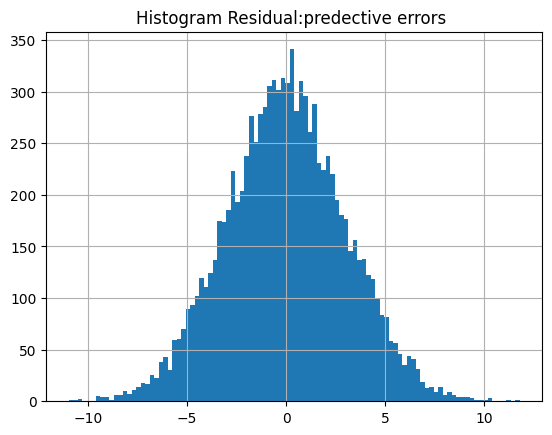

In [161]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('Histogram Residual:predective errors ')

#### Todo:
explain results

After we managed and added X2 value we got better results in the performance, less errors/mistakes as compared to the previous model.

## Create a train-test split

In [162]:
X_training, X_test, y_training, y_test = train_test_split(X, y)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set.
 * Get the r2_score on the test set.

 Important note: When transforming use `fit_transform` on the training set and use `transform` on the test set.

 __eg:__

 `encoded_training = encoder.fit_transform(X_train[categorical_features])`

 `encoded_testing = encoder.transform(X_test[categorical_features])`
     

In [163]:
X_training.head()

,X1,X2
3610,2.268457,B
6639,4.171824,A
4110,2.582647,B
4470,2.808865,A
3431,2.155976,A


In [164]:
# code
# X_training2 = X_training.copy()

# X_training2['isB'] = [ 1 if x == 'B' else 0  for x in X_training['X2']]
# X_training2.drop('X2', axis = 1, inplace=True)
# X_training2.head()

encoder= OneHotEncoder(drop='first')
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])


X_training2 = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training2.head()


,X1,X2
3610,2.268457,1.0
6639,4.171824,0.0
4110,2.582647,1.0
4470,2.808865,0.0
3431,2.155976,0.0


In [165]:
m = LinearRegression().fit(X_training2, y_training)

X_testEncoded = encoder.transform(X_test[['X2']])
X_test2 = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})
m.score(X_test2, y_test)

0.7018859453356955

## Create a pipeline

Add comments to `todo` parts

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

#for defining the categorial and the numerical var
cat_vars = ['X2']
num_vars = ['X1']

# To create a pipleline for the numerical values
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# To craete a pipeline for the categorial values
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# To create a combined pipleline to process the transformation column values
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [167]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [168]:
modeling_pipeline.score(X_test, y_test)

0.8091050460296091

## Evaluate/create residual plots

In [169]:
y_pred = modeling_pipeline.predict(X_test)

<Axes: >

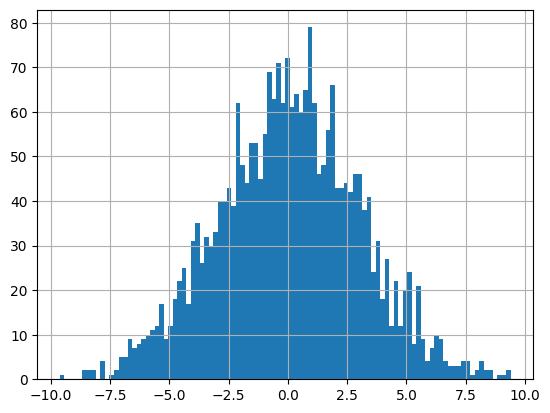

In [179]:
# code
(y_test-y_pred).hist(bins=100)

## Explain findings

Explain findings

1. In the first model we used only a linear function which resulted in the model to perform low.
2. As we transformed the data including the polynomial features and tested again the model showed a increase in the performance.
3. As we moved further and included the X2 value the model performance improved significantly.